In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np


In [2]:
tantan_nucs = []
trf_nucs = []
ultra_nucs = []
trf_repeats = []
ultra_repeats = []

print("reading tantan")
# Read tantan repeats
with open('./tantan_repeats.out', 'r') as file:
    for line in file:
        line = line.strip()
        line = float(line)
        tantan_nucs.append(line)

print("reading ultra")
# Read ULTRA repeats
with open ('./ultra.bed', 'r') as file:
    for line in file:
        line = line.split('\t')
        length = int(line[2]) - int(line[1])
        score = float(line[4])
        ultra_nucs.extend([score for _ in range(length)])
        ultra_repeats.append(score)

print("Reading TRF")
# Read TRF repeats
trf_files = ['0.60_{}.fa.trf2'.format(i) for i in range(10)]
for path in trf_files:
    with open(path, 'r') as file:
        for line in file:
            if line[0] == '@':
                continue
            line = line.split(' ')
            length = int(line[1]) - int(line[0])
            score = float(line[7])
            trf_nucs.extend([score for _ in range(length)])
            trf_repeats.append(score)

print("Converting to tensors")
trf_nucs = torch.tensor(trf_nucs).numpy()
trf_repeats = torch.tensor(trf_repeats).numpy()
ultra_nucs = torch.tensor(ultra_nucs).numpy()
ultra_repeats = torch.tensor(ultra_repeats).numpy()
tantan_nucs = torch.tensor(tantan_nucs).numpy()

print("trf: ", len(trf_nucs), len(trf_repeats))
print("tantan: ", len(tantan_nucs))
print("ultra: ", len(ultra_nucs), len(ultra_repeats))

reading tantan
reading ultra
Reading TRF
Converting to tensors
trf:  17792674 944870
tantan:  52022672
ultra:  7695037 293174


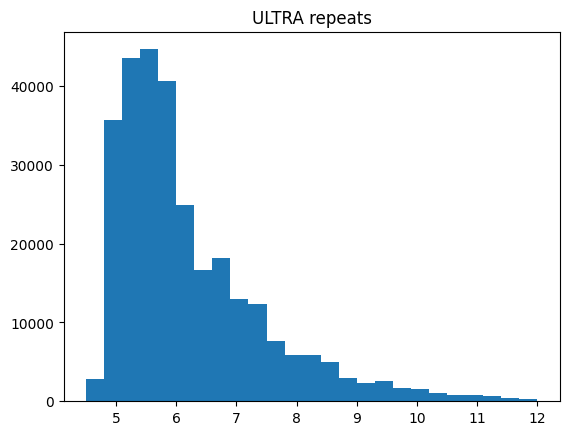

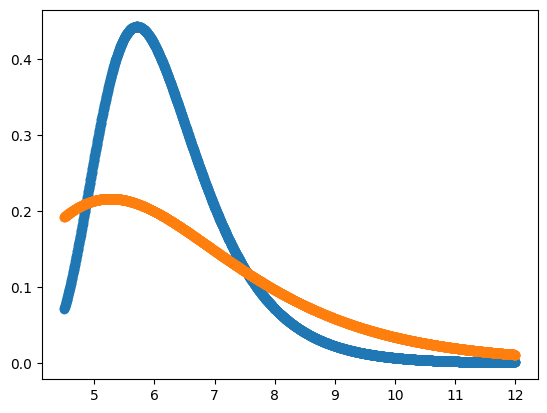

5.2654777490441305 1.6993077971927788


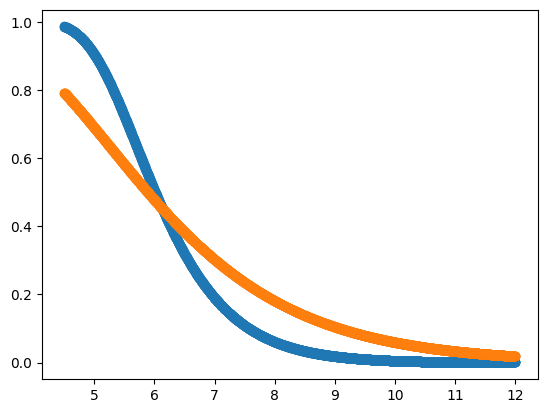

(5.707426063467937, 0.8300825059413961)


In [28]:
import scipy
plt.show()
plt.hist(ultra_repeats, bins=25, range=(4.5, 12))
plt.title("ULTRA repeats")
plt.show()

scale = np.pi * ultra_repeats.std() / (6.0**0.5) 
loc = ultra_repeats.mean() - (scale * 0.57722)

hargs = scipy.stats.gumbel_r.fit(ultra_repeats)
x = np.linspace(4.5, 12, 2000)
y = scipy.stats.gumbel_r.pdf(x, *hargs)

plt.scatter(x, y)


y = scipy.stats.gumbel_r.pdf(x, loc, scale)
plt.scatter(x, y)
plt.show()


print(loc, scale)
y = scipy.stats.gumbel_r.cdf(x, *hargs)
plt.scatter(x, 1.0 - y)
y = scipy.stats.gumbel_r.cdf(x, loc, scale)
plt.scatter(x, 1.0 - y)

plt.scatter
plt.show()

print(hargs)



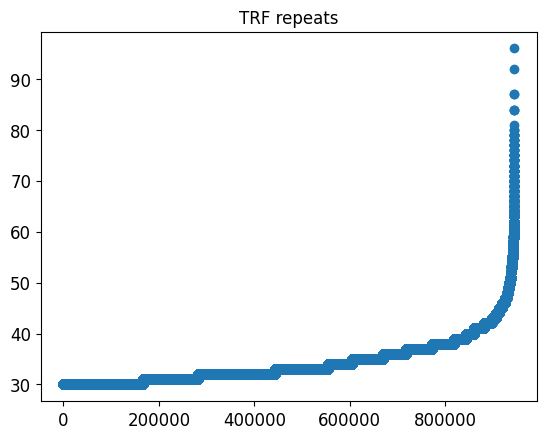

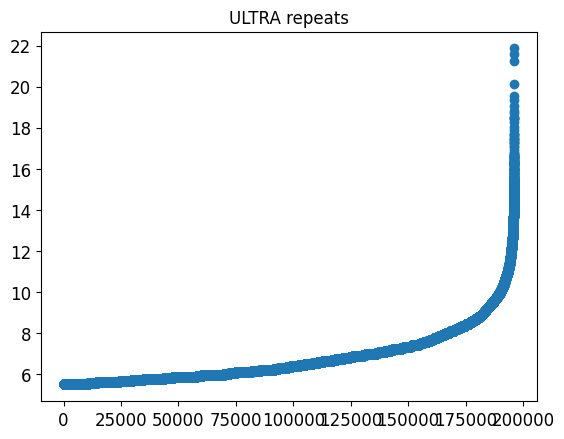

In [5]:
y = np.sort(trf_repeats)
x = np.arange(len(y))
plt.scatter(x, y)
plt.title("TRF repeats")
plt.show()


y = np.sort(ultra_repeats)
y = y[y > 5.5]
x = np.arange(len(y))
plt.scatter(x, y)
plt.title("ULTRA repeats")
plt.show()

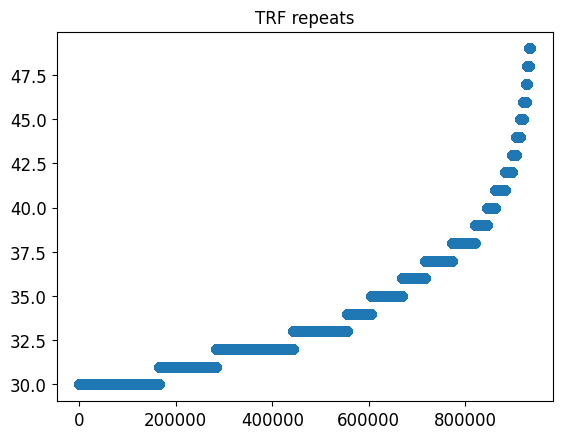

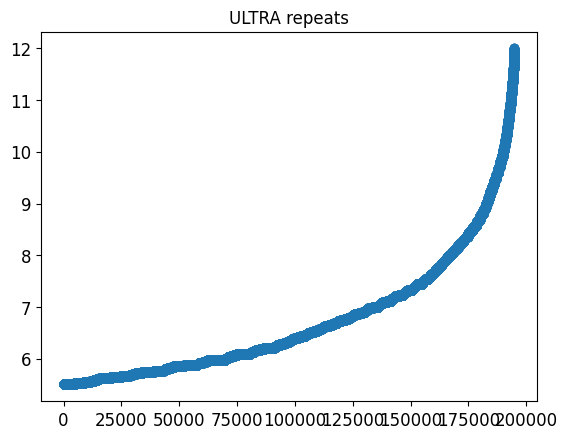

In [6]:
y = np.sort(trf_repeats)
y = y[y < 50]
x = np.arange(len(y))

plt.scatter(x, y)
plt.title("TRF repeats")
plt.show()


y = np.sort(ultra_repeats)
y = y[y > 5.5]
y = y[y < 12.0]
x = np.arange(len(y))
plt.scatter(x, y)
plt.title("ULTRA repeats")
plt.show()

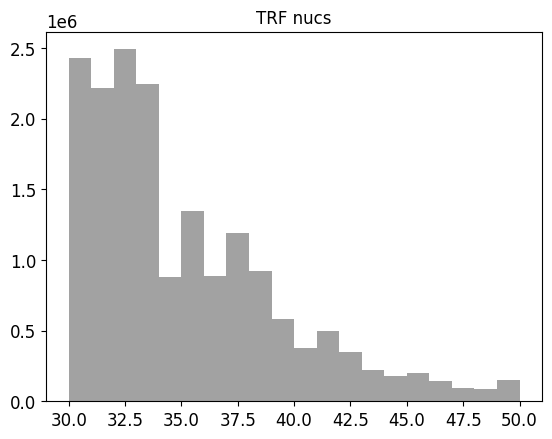

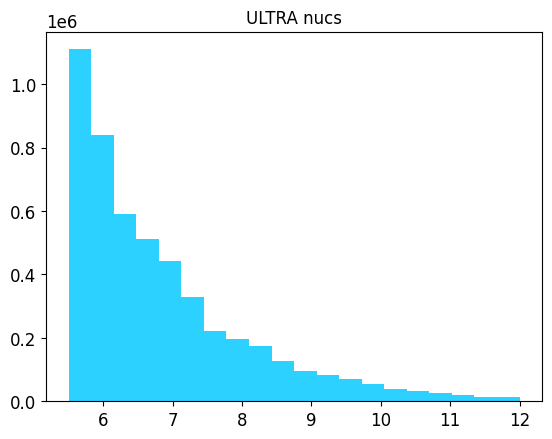

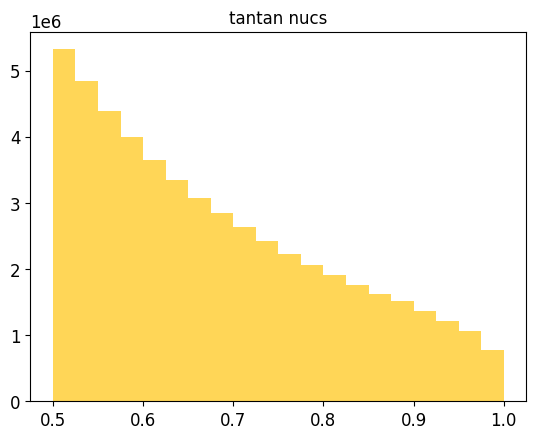

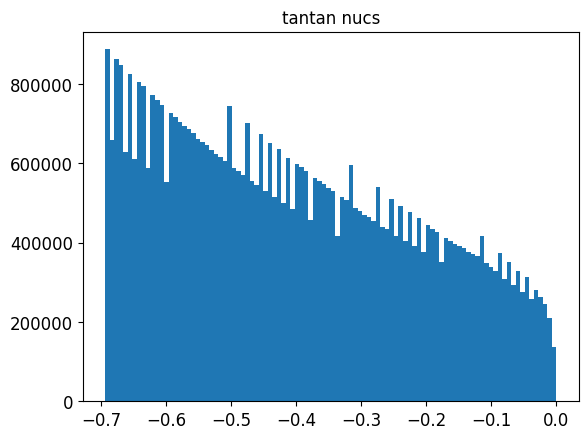

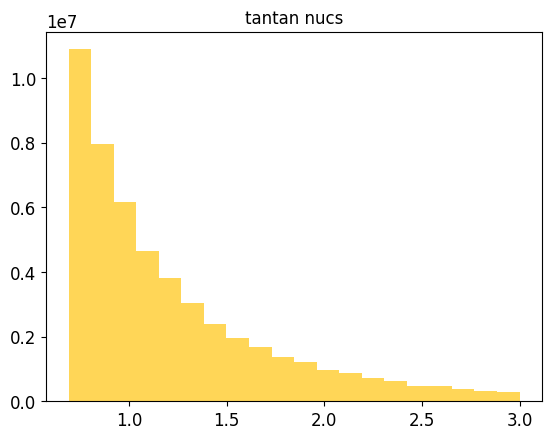

In [7]:
colors = ["#2CD1FF", "#FFD657", "#A2A2A2",]

plt.hist(trf_nucs, bins=20, range=(30,50), color=colors[2])
plt.title("TRF nucs")
plt.show()
plt.hist(ultra_nucs, bins=20, range=(5.5,12), color=colors[0])
plt.title("ULTRA nucs")
plt.show()
plt.hist(tantan_nucs, bins=20, range=(0.5,1.0), color=colors[1])
plt.title("tantan nucs")
plt.show()
plt.hist(np.log(tantan_nucs), bins=100)
plt.title("tantan nucs")
plt.show()

plt.hist(-np.log(1.000001 - tantan_nucs), bins=20, range=(0.69, 3), color=colors[1])
plt.title("tantan nucs")
plt.show()

(21,) [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50.]
(20,) [0.17717769 0.12503017 0.17038559 0.1204423  0.05322614 0.06871768
 0.05108278 0.05817284 0.05049008 0.02707762 0.01797557 0.02194617
 0.01635337 0.00934127 0.00714238 0.00794654 0.00570814 0.00345585
 0.00307353 0.00525427]


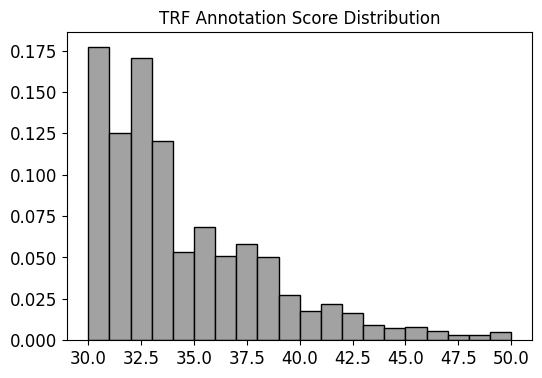

In [29]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
figsize=(6,4)

colors = ["#2CD1FF", "#FFD657", "#A2A2A2",]

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

weights = [1.0 / len(trf_repeats)] * len(trf_repeats)

hist, bins = np.histogram(trf_repeats, bins=20, range=(30,50))
hist = hist / sum(hist)
print(bins.shape, bins)
print(hist.shape, hist)
plt.figure(figsize=figsize)
plt.bar(bins[:-1], hist, color=colors[2], ec='black', align='edge', width=bins[1] - bins[0])
#plt.ylim([0,0.22])
plt.title("TRF Annotation Score Distribution")
plt.show()

(20,) (21,)
(21,) [30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50.]
(20,) [0.17717769 0.12503017 0.17038559 0.1204423  0.05322614 0.06871768
 0.05108278 0.05817284 0.05049008 0.02707762 0.01797557 0.02194617
 0.01635337 0.00934127 0.00714238 0.00794654 0.00570814 0.00345585
 0.00307353 0.00525427]


<Figure size 600x400 with 0 Axes>

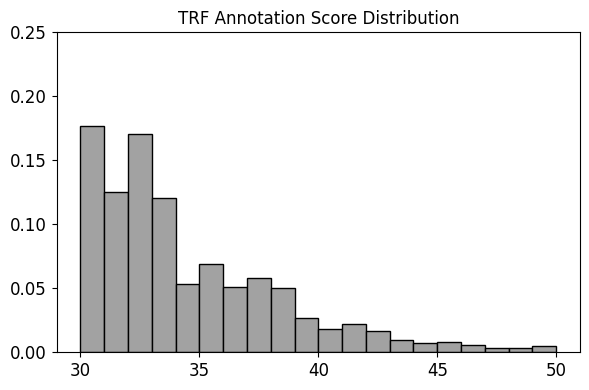

(21,) [ 5.5    5.825  6.15   6.475  6.8    7.125  7.45   7.775  8.1    8.425
  8.75   9.075  9.4    9.725 10.05  10.375 10.7   11.025 11.35  11.675
 12.   ]
(20,) [0.23834447 0.18660653 0.11438995 0.09693359 0.08970372 0.06720852
 0.03988486 0.03377359 0.03201872 0.02534815 0.0169535  0.01361822
 0.01248935 0.00969285 0.00623955 0.00477715 0.00432047 0.00350974
 0.00242193 0.00176513]


<Figure size 600x400 with 0 Axes>

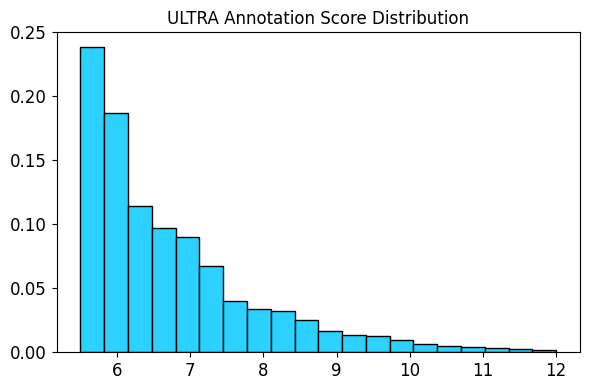

(21,) [0.69   0.8055 0.921  1.0365 1.152  1.2675 1.383  1.4985 1.614  1.7295
 1.845  1.9605 2.076  2.1915 2.307  2.4225 2.538  2.6535 2.769  2.8845
 3.    ]
(20,) [0.21678333 0.1583735  0.12278399 0.09249953 0.07598994 0.06046849
 0.04785334 0.03917824 0.03347923 0.02699736 0.0241156  0.01917593
 0.01715369 0.01409187 0.01224441 0.00962485 0.0091855  0.00785773
 0.00663054 0.00551295]


<Figure size 600x400 with 0 Axes>

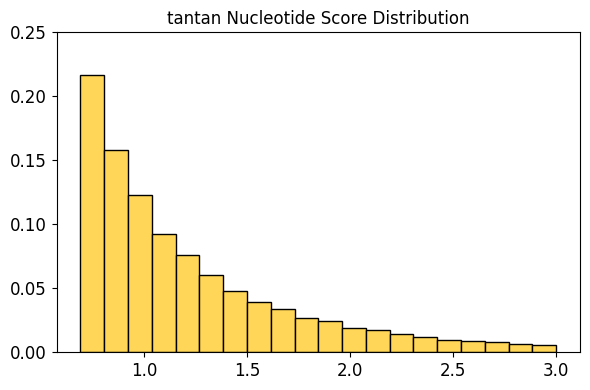

(21,) [0.5   0.525 0.55  0.575 0.6   0.625 0.65  0.675 0.7   0.725 0.75  0.775
 0.8   0.825 0.85  0.875 0.9   0.925 0.95  0.975 1.   ]
(20,) [0.1023137  0.09295991 0.08439941 0.07670556 0.0700297  0.0642497
 0.05917012 0.05475503 0.05063973 0.04658532 0.04291475 0.03959833
 0.03664892 0.03376714 0.03128465 0.0290625  0.02620452 0.02331218
 0.02045752 0.01494129]


<Figure size 600x400 with 0 Axes>

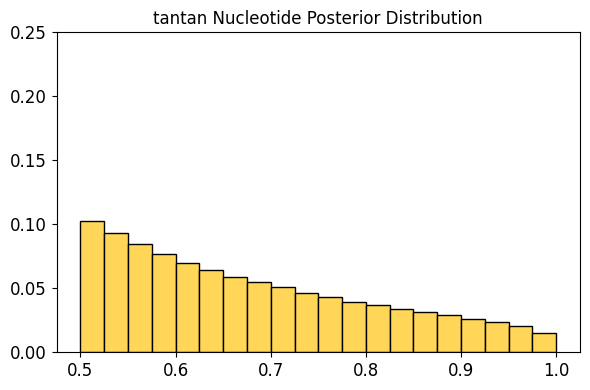

In [3]:
import matplotlib
from matplotlib.ticker import ScalarFormatter
figsize=(6,4)

colors = ["#2CD1FF", "#FFD657", "#A2A2A2",]

matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12) 

weights = [1.0 / len(trf_repeats)] * len(trf_repeats)

hist, bins = np.histogram(trf_repeats, bins=20, range=(30,50))
#hist = hist / sum(hist)

print(hist.shape, bins.shape)
plt.figure(figsize=figsize)
hist, bins = np.histogram(trf_repeats, bins=20, range=(30,50))
hist = hist / sum(hist)
print(bins.shape, bins)
print(hist.shape, hist)
plt.figure(figsize=figsize)
plt.bar(bins[:-1], hist, color=colors[2], ec='black', align='edge', width=bins[1] - bins[0])
plt.ylim([0,0.25])
plt.title("TRF Annotation Score Distribution")

plt.xticks([30, 35, 40, 45, 50])
plt.yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25])
#plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))

plt.tight_layout()
plt.savefig('trf_dist.pdf', dpi=300)
plt.show()

plt.figure(figsize=figsize)
weights = [1.0 / len(ultra_repeats)] * len(ultra_repeats)
hist, bins = np.histogram(ultra_repeats, bins=20, range=(5.5,12))
hist = hist / sum(hist)
print(bins.shape, bins)
print(hist.shape, hist)
plt.figure(figsize=figsize)
plt.bar(bins[:-1], hist, color=colors[0], ec='black', align='edge', width=bins[1] - bins[0])
#plt.hist(ultra_repeats, bins=20, range=(5.5,12), color=colors[0], ec='black',  weights=weights)
plt.ylim([0,0.25])
plt.yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25])
plt.title("ULTRA Annotation Score Distribution")

plt.tight_layout()
plt.savefig('ultra_dist.pdf', dpi=300)
plt.show()

plt.figure(figsize=figsize)
hist, bins = np.histogram(-np.log(1.000001 - tantan_nucs), bins=20, range=(0.69, 3))
hist = hist / sum(hist)
print(bins.shape, bins)
print(hist.shape, hist)
plt.figure(figsize=figsize)
plt.bar(bins[:-1], hist, color=colors[1], ec='black', align='edge', width=bins[1] - bins[0])
#plt.hist(-np.log(1.00000001 - tantan_nucs), bins=20, range=(0.69, 3), color=colors[1], ec='black', weights=weights)
plt.ylim([0,0.25])
plt.yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25])
plt.title("tantan Nucleotide Score Distribution")
plt.tight_layout()
plt.savefig('tantan_s_dist.pdf', dpi=300)
plt.show()

plt.figure(figsize=figsize)
hist, bins = np.histogram(tantan_nucs, bins=20, range=(0.5, 1))
hist = hist / sum(hist)
print(bins.shape, bins)
print(hist.shape, hist)
plt.figure(figsize=figsize)
plt.bar(bins[:-1], hist, color=colors[1], ec='black', align='edge', width=bins[1] - bins[0])
#plt.hist(-np.log(1.00000001 - tantan_nucs), bins=20, range=(0.69, 3), color=colors[1], ec='black', weights=weights)
plt.ylim([0,0.25])
plt.yticks([0, 0.05, 0.1, 0.15, 0.20, 0.25])
plt.title("tantan Nucleotide Posterior Distribution")
plt.tight_layout()
plt.savefig('tantan_s_dist.pdf', dpi=300)
plt.show()

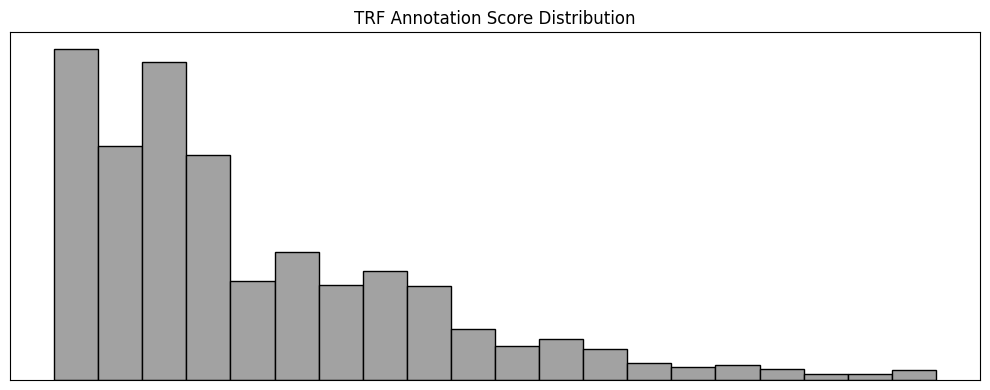

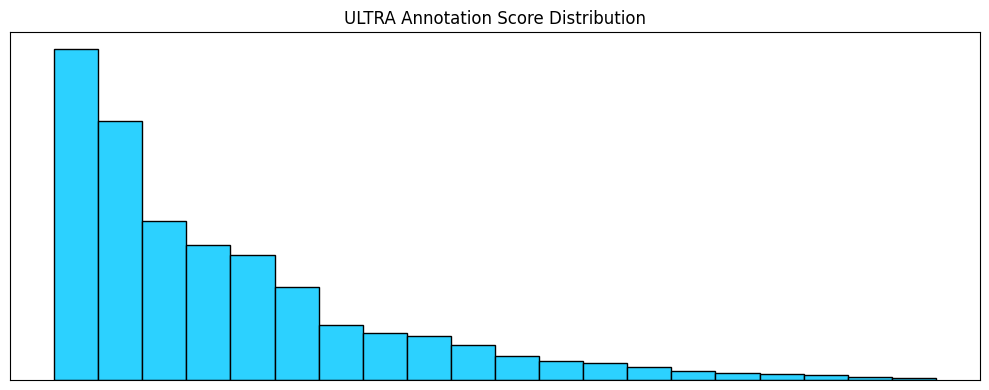

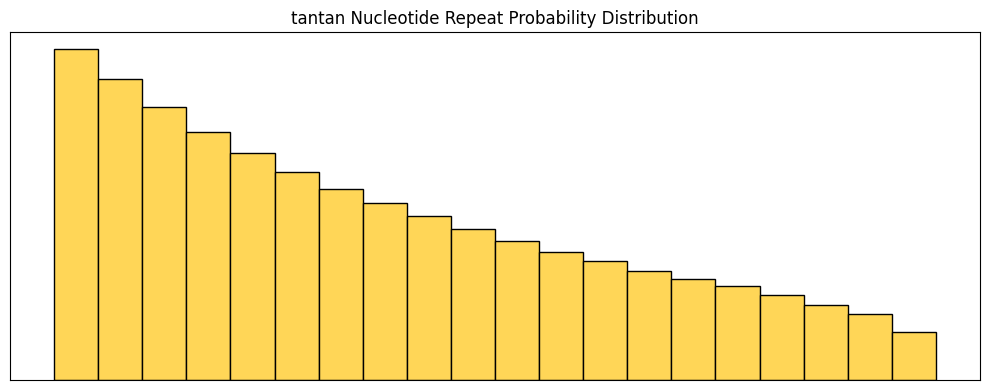

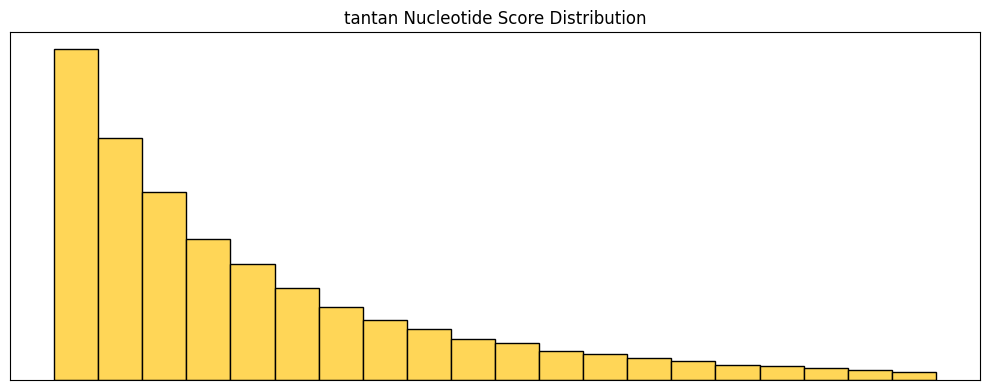

In [36]:
from matplotlib.ticker import ScalarFormatter
figsize=(10,4)

colors = ["#2CD1FF", "#FFD657", "#A2A2A2",]

plt.figure(figsize=figsize)

plt.hist(trf_repeats, bins=20, range=(30,50), color=colors[2], ec='black', density=True)
plt.title("TRF Annotation Score Distribution")

plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.savefig('trf_dist.pdf', dpi=300)
plt.show()

plt.figure(figsize=figsize)
plt.hist(ultra_repeats, bins=20, range=(5.5,12), color=colors[0], ec='black')
plt.xticks([])
plt.yticks([])
plt.title("ULTRA Annotation Score Distribution")
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.savefig('ultra_dist.pdf', dpi=300)
plt.show()

plt.figure(figsize=figsize)
plt.hist(tantan_nucs, bins=20, range=(0.5,1.0), color=colors[1], ec='black')
plt.xticks([])
plt.yticks([])
plt.title("tantan Nucleotide Repeat Probability Distribution")
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.savefig('tantan_p_dist.pdf', dpi=300)
plt.show()

plt.figure(figsize=figsize)
plt.hist(-np.log(1.000001 - tantan_nucs), bins=20, range=(0.69, 3), color=colors[1], ec='black')
plt.xticks([])
plt.yticks([])
plt.title("tantan Nucleotide Score Distribution")
plt.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
plt.tight_layout()
plt.savefig('tantan_s_dist.pdf', dpi=300)
plt.show()

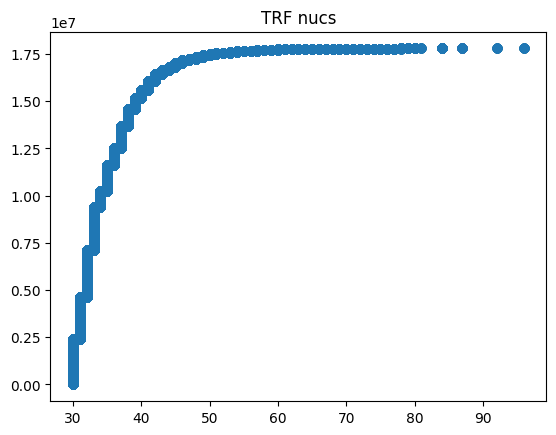

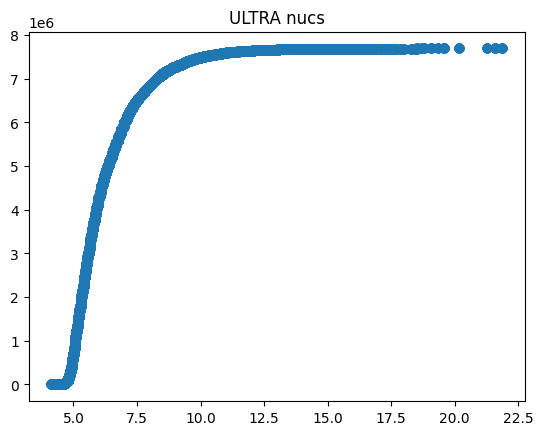

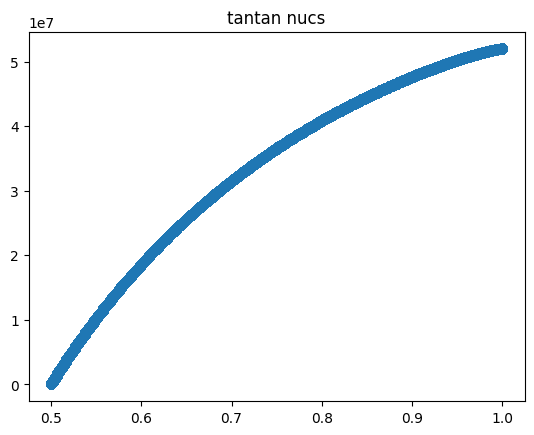

In [38]:
y = np.sort(trf_nucs)
#y = y[y < 50]
x = np.arange(len(y))

plt.scatter(y, x)
plt.title("TRF nucs")
plt.show()


y = np.sort(ultra_nucs)
#y = y[y > 5.5]
#y = y[y < 12.0]
x = np.arange(len(y))
plt.scatter(y, x)
plt.title("ULTRA nucs")
plt.show()

y = np.sort(tantan_nucs)
x = np.arange(len(y))
plt.scatter(y, x)
plt.title("tantan nucs")
plt.show()

In [5]:
import scipy
import torch
import numpy as np
ultra_dist = []
ultra_dist_nucs = []
print("reading ultra")
# Read ULTRA repeats
with open ('./ultra_0.5.bed', 'r') as file:
    for line in file:
        line = line.split('\t')
        length = int(line[2]) - int(line[1])
        score = float(line[4])
        ultra_dist.append(score)
        ultra_dist_nucs.extend([score for _ in range(length)])

ultra_dist = torch.tensor(ultra_dist).numpy()
ultra_dist_nucs = torch.tensor(ultra_dist_nucs).numpy()

reading ultra


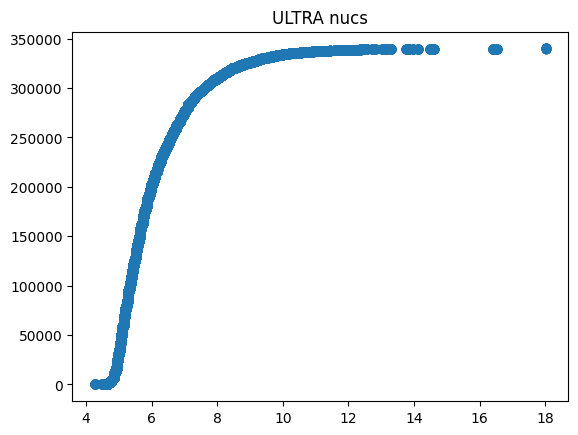

Text(0.5, 1.0, 'ULTRA nucs')

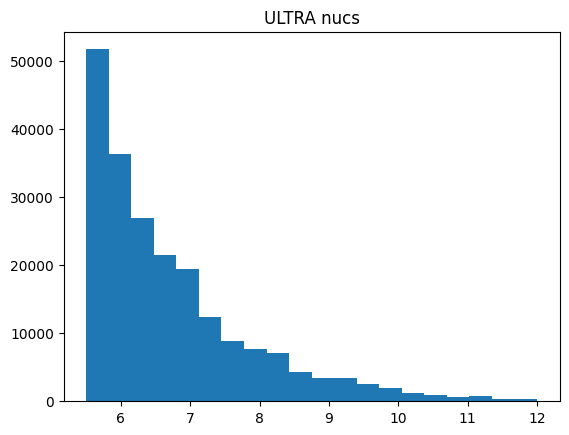

In [6]:
y = np.sort(ultra_dist_nucs)
#y = y[y > 5.5]
#y = y[y < 12.0]
x = np.arange(len(y))
plt.scatter(y, x)
plt.title("ULTRA nucs")
plt.show()

plt.hist(ultra_dist_nucs, bins=20, range=(5.5,12))
plt.title("ULTRA nucs")

In [8]:
print(len(ultra_dist) / 1000000000.0)

ultra_dist_big = np.concatenate((ultra_dist_nucs, np.zeros(1000000000 - len(ultra_dist_nucs))))
print(ultra_dist_big.min(), ultra_dist_big.max(), ultra_dist_big.mean())
loc, scale= scipy.stats.expon.fit(ultra_dist_big)
print(loc, scale)

1.2991e-05
0.0 18.01873779296875 0.0020927880293102265
0.0 0.0020927880293102265


In [77]:
print(len(ultra_dist_nucs) / 1000000000.0)

ultra_dist_big = np.concatenate((ultra_dist_nucs, np.zeros(1000000000 - len(ultra_dist_nucs))))
print(ultra_dist.min(), ultra_dist.max())
print(ultra_repeats.min(), ultra_repeats.max())
loc, scale= scipy.stats.expon.fit(ultra_dist_nucs)
print(loc, scale)

0.000330256
4.272949 18.018738
4.124779 21.860962
4.27294921875 1.8913602828979492
